# Algotrading 

In [1]:

%load_ext autoreload
%autoreload 2
# make the necessary imports 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import warnings
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import pyfolio as pf # install with pip install git+ssh://git@github.com/giocaizzi/pyfolio.git
import warnings


from surfingcrypto import Config,TS
from surfingcrypto.algotrading.backtesting import BackTest
from surfingcrypto.algotrading.features import BinaryLaggedFeatures

# set the style and ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/opt/miniconda3/envs/cryptoenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
/opt/miniconda3/envs/cryptoenv/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [2]:
c = Config("/Users/giorgiocaizzi/Documents/GitHub/surfingcrypto/config")
ticker = "ETH"
ts = TS(c, coin=ticker)
ts.ta_indicators()
ts.df


,Open,High,Low,Close,Volume,Market Cap,SMA_26,SMA_12,SMA_200,SMA_100,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14
Date,,,,,,,,,,,,,,,,,,,
2017-10-01 00:00:00+00:00,255.288687,256.747390,249.797667,256.044212,2.593030e+08,2.430109e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-02 00:00:00+00:00,256.167001,256.711876,250.857533,253.580263,2.893556e+08,2.407106e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-03 00:00:00+00:00,253.587078,256.395551,245.386642,248.989454,2.738634e+08,2.363906e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-04 00:00:00+00:00,249.237185,254.456920,247.380720,248.964687,2.194011e+08,2.364053e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-05 00:00:00+00:00,249.062535,254.518348,245.716713,252.593705,2.166371e+08,2.398902e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02 00:00:00+00:00,2684.030585,2734.287269,2654.372209,2718.791819,1.770695e+10,3.279439e+11,2792.000895,2714.788640,3068.813568,2633.255256,-43.665375,-10.112612,-33.552763,2609.535515,2759.574093,2909.612671,10.874039,0.364094,47.401841
2022-05-03 00:00:00+00:00,2718.546125,2719.287351,2624.402083,2644.522293,1.237582e+10,3.190207e+11,2779.255242,2705.388898,3065.386466,2637.347949,-46.651521,-10.479006,-36.172515,2598.419611,2748.694399,2898.969187,10.934267,0.153395,43.912431
2022-05-04 00:00:00+00:00,2644.194517,2789.713909,2639.987546,2768.699442,1.712333e+10,3.340372e+11,2772.865437,2707.063499,3062.719273,2643.484266,-38.553583,-1.904854,-36.648728,2598.245007,2747.603512,2896.962017,10.871911,0.570622,50.476643


## Feature Engineering

The chosen algo uses binary encoding for upward or downward movements.

In [3]:
f = BinaryLaggedFeatures(
    ts,
    indicators=[
        "SMA_12_26_Signal",
        "SMA_100_200_Signal",
        "MACD_12_26_9_Signal",
        "BBL_20_2_Signal",
        "RSI_14_Signal",
    ],
    lags=[1, 2, 3, 7, 14],
)
f


BinaryLaggedFeatures(ts=ETH,lags=[1, 2, 3, 7, 14])

In [4]:
f.indicators

{'i_01': 'SMA_12_26_Signal',
 'i_02': 'SMA_100_200_Signal',
 'i_03': 'MACD_12_26_9_Signal',
 'i_04': 'BBL_20_2_Signal',
 'i_05': 'RSI_14_Signal'}

### Signals

- SMA Cross
- MACD
- Bollinger Bands
- RSI

In [5]:
f.df.tail()


,Open,High,Low,Close,Volume,Market Cap,SMA_26,SMA_12,SMA_200,SMA_100,...,RSI_14,SMA_12_26_Signal,SMA_100_200_Signal,MACD_12_26_9_Signal,PREV_STOCK,PREV_LOWERBB,PREV_UPPERBB,BBL_20_2_Signal,PREV_RSI,RSI_14_Signal
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-02 00:00:00+00:00,2684.030585,2734.287269,2654.372209,2718.791819,1.770695e+10,3.279439e+11,2792.000895,2714.788640,3068.813568,2633.255256,...,47.401841,0.0,0.0,0.0,2684.165515,2613.833434,2913.348412,1.0,45.527929,0.0
2022-05-03 00:00:00+00:00,2718.546125,2719.287351,2624.402083,2644.522293,1.237582e+10,3.190207e+11,2779.255242,2705.388898,3065.386466,2637.347949,...,43.912431,0.0,0.0,0.0,2718.791819,2609.535515,2909.612671,1.0,47.401841,0.0
2022-05-04 00:00:00+00:00,2644.194517,2789.713909,2639.987546,2768.699442,1.712333e+10,3.340372e+11,2772.865437,2707.063499,3062.719273,2643.484266,...,50.476643,0.0,0.0,0.0,2644.522293,2598.419611,2898.969187,1.0,43.912431,0.0
2022-05-05 00:00:00+00:00,2768.305714,2776.983095,2567.971679,2608.436839,2.148347e+10,3.147363e+11,2757.841926,2697.447281,3059.174146,2647.840879,...,43.414647,0.0,0.0,0.0,2768.699442,2598.245007,2896.962017,1.0,50.476643,0.0
2022-05-06 00:00:00+00:00,2608.169786,2617.175690,2502.838952,2554.894640,1.993458e+10,3.083096e+11,2742.609982,2685.034888,3055.808933,2651.434204,...,41.334024,0.0,0.0,0.0,2608.436839,2579.534020,2895.260186,1.0,43.414647,0.0


### Model dataframe

In [6]:
f.model_df.tail()

,ETH,i_01,i_02,i_03,i_04,i_05,returns,direction,i_01_lag01,i_01_lag02,...,i_04_lag01,i_04_lag02,i_04_lag03,i_04_lag07,i_04_lag14,i_05_lag01,i_05_lag02,i_05_lag03,i_05_lag07,i_05_lag14
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-02 00:00:00+00:00,2718.791819,0.0,0.0,0.0,1.0,0.0,0.012818,1,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2022-05-03 00:00:00+00:00,2644.522293,0.0,0.0,0.0,1.0,0.0,-0.027697,-1,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2022-05-04 00:00:00+00:00,2768.699442,0.0,0.0,0.0,1.0,0.0,0.045887,1,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2022-05-05 00:00:00+00:00,2608.436839,0.0,0.0,0.0,1.0,0.0,-0.059627,-1,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2022-05-06 00:00:00+00:00,2554.894640,0.0,0.0,0.0,1.0,0.0,-0.020740,-1,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


### Build and Apply Classification Machine Learning Algorithms

Select Logistic regression, Gaussian Naive Bayes, Support Vector Machine, Random Forest, and MLP Classifier approaches to predict the market direction. Please refer sklearn documentation for detail on these and other algorithms.
https://scikit-learn.org/stable/index.html

In [7]:
# create a dictionary of selected algorithms
models = {
    "log_reg": linear_model.LogisticRegression(),
    "gauss_nb": GaussianNB(),
    "svm": SVC(),
    "random_forest": RandomForestClassifier(max_depth=10, n_estimators=100),
    "MLP": MLPClassifier(max_iter=500),
}


In [8]:
# function that fits all models.
def fit_models(f:BinaryLaggedFeatures):
    mfit = {
        model: models[model].fit(f.model_df[f.x_cols_names], f.model_df["direction"])
        for model in models.keys()
    }



In [9]:
# function that predicts (derives all position values) from the fitted models
def estimate_positions(f:BinaryLaggedFeatures):
    for model in models.keys():
        f.model_df["pos_" + model] = models[model].predict(f.model_df[f.x_cols_names])



In [10]:
# fit the models
fit_models(f)
# estimate
estimate_positions(f)


In [11]:
f.model_df.tail()


,ETH,i_01,i_02,i_03,i_04,i_05,returns,direction,i_01_lag01,i_01_lag02,...,i_05_lag01,i_05_lag02,i_05_lag03,i_05_lag07,i_05_lag14,pos_log_reg,pos_gauss_nb,pos_svm,pos_random_forest,pos_MLP
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-02 00:00:00+00:00,2718.791819,0.0,0.0,0.0,1.0,0.0,0.012818,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,-1,-1,-1,-1
2022-05-03 00:00:00+00:00,2644.522293,0.0,0.0,0.0,1.0,0.0,-0.027697,-1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,-1,-1,-1,-1
2022-05-04 00:00:00+00:00,2768.699442,0.0,0.0,0.0,1.0,0.0,0.045887,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,-1,-1,-1,-1
2022-05-05 00:00:00+00:00,2608.436839,0.0,0.0,0.0,1.0,0.0,-0.059627,-1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,-1,-1,-1,-1
2022-05-06 00:00:00+00:00,2554.894640,0.0,0.0,0.0,1.0,0.0,-0.020740,-1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,-1,-1,-1,-1


### Strategy evalutation using Backtrader

Strategy: 
1.	Buy when the predicted value is +1 and sell (only if stock is in possession) when the predicted value is -1.
2.	All-in strategy—when creating a buy order, buy as many shares as possible.
3.	Short selling is not allowed

In [12]:
start = "2021-01-01"

performance = {}
backtests = {}
for key in models.keys():
    prices = ts.df[["Open", "High", "Low", "Close", "Volume"]]
    prices = prices.loc[start:]
    prices.rename(
        columns={
            "Open": "open",
            "High": "high",
            "Low": "low",
            "Close": "close",
            "Volume": "volume",
        },
        inplace=True,
    )
    # add the predicted column to prices dataframe. right joining them so to start from backtesting startdate.
    # predictions = stock[["strategy_" + key]]
    predictions = stock[["pos_" + key]]

    # predictions.rename(columns={"strategy_" + key: "predicted"}, inplace=True)

    predictions.rename(columns={"pos_" + key: "predicted"}, inplace=True)
    prices = predictions.join(prices, how="right").dropna()

    # run
    i_backtest = BackTest(prices, ticker, verbose=False)
    i_backtest.run()
    backtests[key] = i_backtest
    performance[key] = i_backtest.performance_stats()
performance = pd.DataFrame(performance)



NameError: name 'stock' is not defined

In [ ]:
performance


,log_reg,gauss_nb,svm,random_forest,MLP
Annual return,2.564663,2.529885,4.203794,1.317675,0.930007
Cumulative returns,10.900353,10.675182,23.870649,4.143669,2.600696
Annual volatility,0.603994,0.745243,0.623922,0.588766,0.578811
Sharpe ratio,2.406153,2.068242,2.957524,1.720109,1.421330
Calmar ratio,11.118809,5.106139,15.430330,3.368793,2.685363
Stability,0.935180,0.931734,0.904631,0.714188,0.645816
Max drawdown,-0.230660,-0.495459,-0.272437,-0.391142,-0.346324
Omega ratio,1.682556,1.516160,1.849788,1.479225,1.384968
Sortino ratio,4.264629,3.305036,5.372291,2.876638,2.387700
Skew,0.673918,0.128181,0.682008,0.626497,0.834116


## Choose best model from backtesting results

Choose the one with the greates cumulative returns.

In [ ]:
print(performance.loc["Cumulative returns"].idxmax())
backtest = backtests[performance.loc["Cumulative returns"].idxmax()]



svm


In [ ]:
backtest.end_value


31088.311718931134

In [ ]:
backtest.print_log()


2021-01-02, Open: 600.888, Close: 638.266
2021-01-02,     BUY CREATED --- Size: 2.060, Price: 600.860, Cost: 1237.500
2021-01-02,     BUY EXECUTED --- Size: 2.060, Price: 600.888, Cost: 1237.559, Commission: 12.376
2021-02-07, Open: 1392.314, Close: 1339.759
2021-02-07,     SELL CREATED --- Size: -2.060, Price: 1392.514, Cost: -2867.951
2021-02-07,     SELL EXECUTED --- Size: -2.060, Price: 1392.314, Cost: -2867.539, Commission: 28.675
2021-02-07,          -> OPERATION RESULT --- Gross: 1629.980, Net: 1588.929
2021-02-28, Open: 1209.284, Close: 1171.184
2021-02-28,     BUY CREATED --- Size: 2.324, Price: 1209.377, Cost: 2810.539
2021-02-28,     BUY EXECUTED --- Size: 2.324, Price: 1209.284, Cost: 2810.323, Commission: 28.103
2021-05-13, Open: 3170.256, Close: 3076.269
2021-05-13,     SELL CREATED --- Size: -2.324, Price: 3134.596, Cost: -7284.661
2021-05-13,     SELL EXECUTED --- Size: -2.324, Price: 3170.256, Cost: -7367.535, Commission: 73.675
2021-05-13,          -> OPERATION RESULT

# Plotting

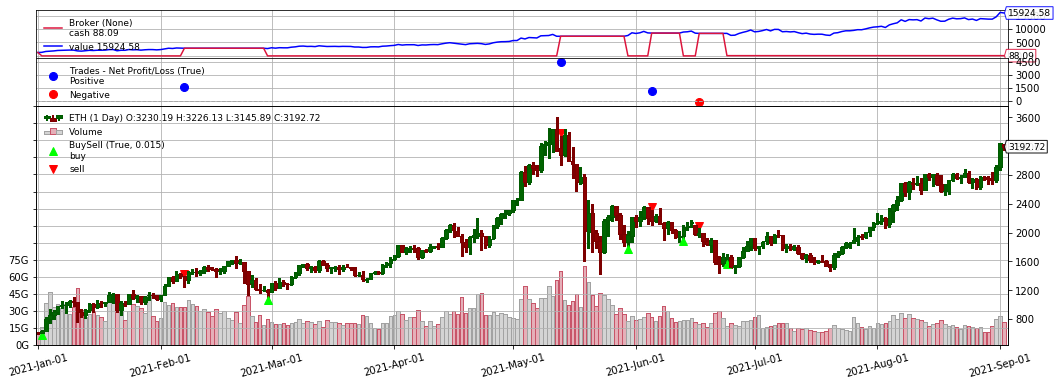

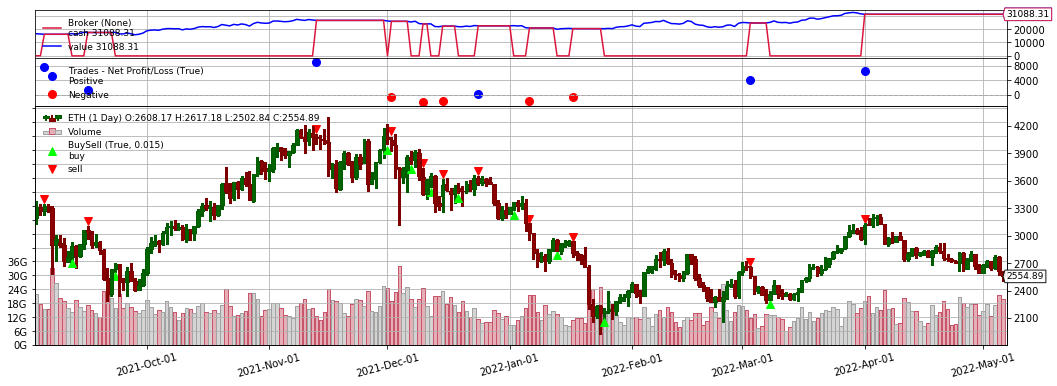

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15, 5]
figs = backtest.cerebro.plot(
    style="candlesticks",
    barup="darkgreen",
    bardown="darkred",
    numfigs=2,
    iplot=False,
    fmt_x_ticks="%Y-%b-%d",
)



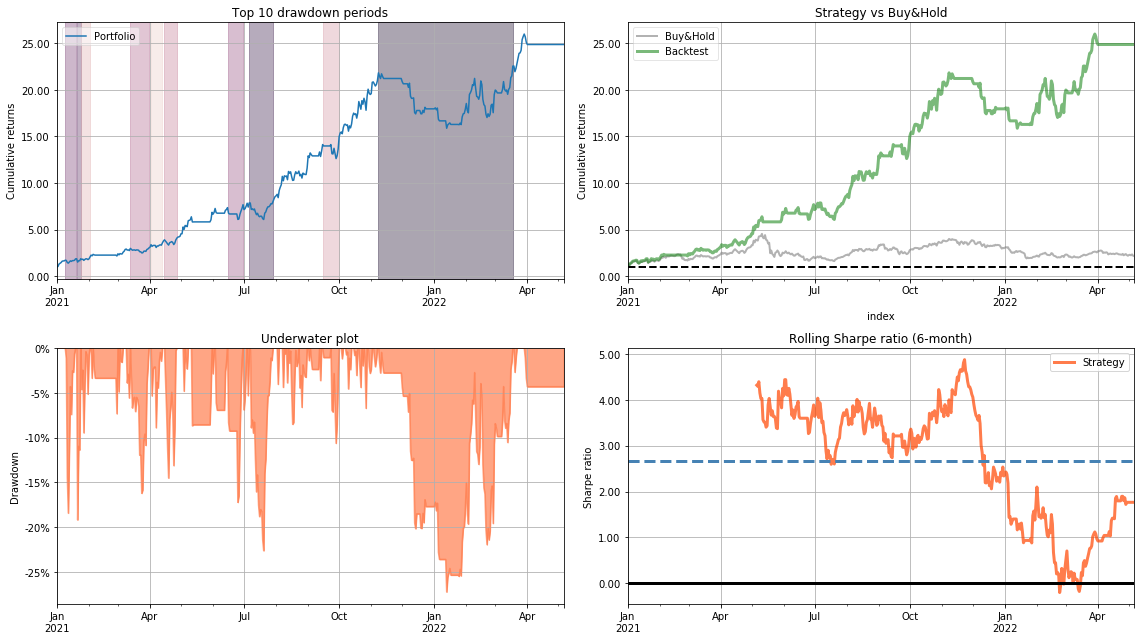

In [ ]:
# plot performance for strategy vs benchmark

# get benchmark returns # just buy and hold
benchmark_rets = stock["returns"]
benchmark_rets = benchmark_rets.filter(backtest.returns.index)
benchmark_rets.name = "Buy&Hold"
benchmark_rets.tail()


fig, ax = plt.subplots(
    nrows=2, ncols=2, figsize=(16, 9), constrained_layout=True
)
axes = ax.flatten()

pf.plot_drawdown_periods(returns=backtest.returns, ax=axes[0])
axes[0].grid(True)
pf.plot_rolling_returns(
    returns=backtest.returns,
    factor_returns=benchmark_rets,
    ax=axes[1],
    title="Strategy vs Buy&Hold",
)
axes[1].grid(True)
pf.plot_drawdown_underwater(returns=backtest.returns, ax=axes[2])
axes[2].grid(True)
pf.plot_rolling_sharpe(returns=backtest.returns, ax=axes[3])
axes[3].grid(True)
# fig.suptitle('Strategy vs Nifty-50 (Buy and Hold)', fontsize=16, y=0.990)

plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.savefig('images/chart3', dpi=300)


# Apply to future

In [ ]:
last = stock.loc[stock.iloc[-1].name, cols_bin]
future = []
for key in indicatori:
    iseries = last.loc[last.index.str.contains(key)].shift()
    iseries.iloc[0] = stock.loc[stock.iloc[-1].name, key]
    future.append(iseries)

future = pd.concat(future)
future.name = stock.index[-1] + pd.Timedelta(days=1)

print(future.name)
print(future)

if models["svm"].predict(future[cols_bin].to_numpy().reshape(1, -1))[0] > 0:
    print("BUY!")
else:
    print("SELL / STAY OUT OF MARKET")


2022-05-07 00:00:00+00:00
i_01_lag01    0.0
i_01_lag02    0.0
i_01_lag03    0.0
i_01_lag07    0.0
i_01_lag14    0.0
i_02_lag01    0.0
i_02_lag02    0.0
i_02_lag03    0.0
i_02_lag07    0.0
i_02_lag14    0.0
i_03_lag01    0.0
i_03_lag02    0.0
i_03_lag03    0.0
i_03_lag07    0.0
i_03_lag14    0.0
i_04_lag01    1.0
i_04_lag02    1.0
i_04_lag03    1.0
i_04_lag07    1.0
i_04_lag14    1.0
i_05_lag01    0.0
i_05_lag02    0.0
i_05_lag03    0.0
i_05_lag07    0.0
i_05_lag14    0.0
Name: 2022-05-07 00:00:00+00:00, dtype: float64
SELL / STAY OUT OF MARKET
